<a href="https://colab.research.google.com/github/Subhashini7/Amazon_Recommendation_engine/blob/main/Copy_of_Welcome_To_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## AMAZON RECOMMENDATION ENGINE

## DATA -- https://lnkd.in/dba7eqGU

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
import importlib
warnings.filterwarnings('ignore')
sns.set_theme(color_codes=True)

In [ ]:
# user- defined function to check library is installed or not, if not installed then it will install automatically at runtime

def check_and_install_library(library_name):
    try:
        importlib.import_module(library_name)
        print(f'{library_name} is already installed.')
    except ImportError:
        print(f'{library_name} is not installed. Installing...')
        try:
            import pip
            pip.main(['install',library_name])
        except:
            print('Error:Failed to install the library.Please install it manually.')

In [ ]:
if 'amazon-product-reviews' not in os.listdir():
    check_and_install_library('opendatasets')
    import opendatasets as od
    od.download('https://www.kaggle.com/datasets/irvifa/amazon-product-reviews')

opendatasets is not installed. Installing...


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

Collecting opendatasets

Downloading opendatasets-0.1.22-py3-none-any.whl (15 kB)

Requirement already satisfied: tqdm in /usr/local/lib/python3.10/dist-packages (from opendatasets) (4.65.0)

Requirement already satisfied: kaggle in /usr/local/lib/python3.10/dist-packages (from opendatasets) (1.5.13)

Requirement already satisfied: click in /usr/local/lib/python3.10/dist-packages (from opendatasets) (8.1.3)

Requirement already satisfied: six>=1.10 in /usr/local/lib/python3.10/dist-packages (from kaggle->opendatasets) (1.16.0)

Requirement already satisfied: certifi in /usr/local/lib/python3.10/dist-packages (from kaggle->opendatasets) (2023.5.7)

Requirement already satisfied: python-dateutil in /usr/local/lib/python3.10/dist-packages (from kaggle->opendatasets) (2.8.2)

Requirement already satisfied: requests in /usr/local/lib/python3.10/dist-packages (from kaggle->opendatasets) (2.27.1)

Requirement already satisfied: python-slugify in /usr/local/lib/python3.10/dist-packages (from kaggle->opendatasets) (8.0.1)

Requirement already satisfied: urllib3 in /usr/local/lib/python3.10/dist-packages (from kaggle->opendatasets) (1.26.16)

Requirement already satisfied: text-unidecode>=1.3 in /usr/local/lib/python3.10/dist-packages (from python-slugify->kaggle->opendatasets) (1.3)

Requirement already satisfied: charset-normalizer~=2.0.0 in /usr/local/lib/python3.10/dist-packages (from requests->kaggle->opendatasets) (2.0.12)

Requirement already satisfied: idna<4,>=2.5 in /usr/local/lib/python3.10/dist-packages (from requests->kaggle->opendatasets) (3.4)

Installing collected packages: opendatasets

Successfully installed opendatasets-0.1.22

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: nagasubhashini
Your Kaggle Key: ··········


100%|██████████| 109M/109M [00:01<00:00, 85.7MB/s]


In [ ]:
#load the dataframe and set column name
df=pd.read_csv('amazon-product-reviews/ratings_Electronics.csv',names=['userId', 'productId','rating','timestamp'])

In [ ]:
df.head()

,userId,productId,rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [ ]:
df.shape

(7824482, 4)

In [ ]:
df.columns

Index(['userId', 'productId', 'rating', 'timestamp'], dtype='object')

As the dataset is too big and it will be difficult to analyse the entire dataset due to limited resourses ,thats why we take randomly 20 percent of data as sample out of whole dataset which is 1564896

In [ ]:
Dataframe=df.sample(n=1564896,ignore_index=True)

In [ ]:
#after taking samples drop the actual data free up the memory
del df

In [ ]:
Dataframe.head()

,userId,productId,rating,timestamp
0,A3IMRPYBQ107GF,B000H82NI2,5.0,1246320000
1,A2HMHSIV39YX5K,B000MFLBDI,5.0,1284854400
2,A26IO3OMPL9RM6,B000167NZI,5.0,1345507200
3,A29RWBHQCX789H,B007IMPMW4,5.0,1389657600
4,A536RMZLZ2DRM,B00AR0M7ZE,4.0,1392681600


In [ ]:
Dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1564896 entries, 0 to 1564895
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   userId     1564896 non-null  object 
 1   productId  1564896 non-null  object 
 2   rating     1564896 non-null  float64
 3   timestamp  1564896 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 47.8+ MB


In [ ]:
#drop timestamp column
Dataframe.drop('timestamp',axis=1,inplace=True)

In [ ]:
Dataframe.describe()

,rating
count,1.564896e+06
mean,4.012573e+00
std,1.381014e+00
min,1.000000e+00
25%,3.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


In [ ]:
Dataframe.isnull().sum()

userId       0
productId    0
rating       0
dtype: int64

In [ ]:
Dataframe[Dataframe.duplicated()].shape[0]

0

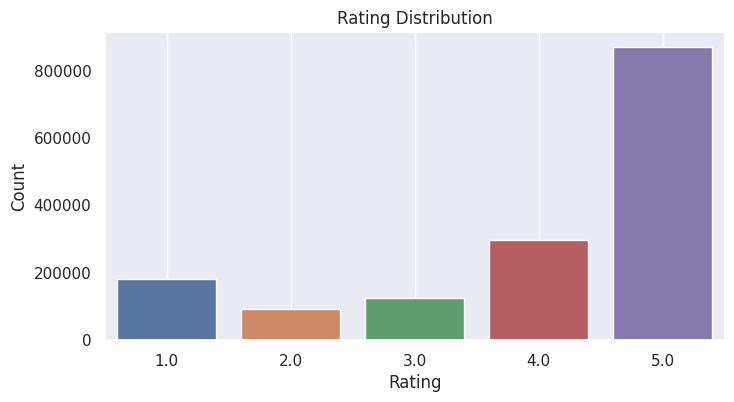

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x='rating',data=Dataframe)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.grid()
plt.show()

In [ ]:
print('Total rating: ',Dataframe.shape[0])
print('Total unique users : ',Dataframe['userId'].unique().shape[0])
print('Total unique products : ',Dataframe['productId'].unique().shape[0])

Total rating:  1564896
Total unique users :  1225546
Total unique products :  237643


In [ ]:
no_of_rated_products_per_user = Dataframe.groupby(by='userId')['rating'].count().sort_values(ascending=False)
no_of_rated_products_per_user.head()

userId
A3OXHLG6DIBRW8    112
A5JLAU2ARJ0BO     111
ADLVFFE4VBT8      104
A680RUE1FDO8B      96
A6FIAB28IS79       79
Name: rating, dtype: int64

In [ ]:
print('No of rated products more than 50 per user:{}'.format(sum(no_of_rated_products_per_user>=50)))

No of rated products more than 50 per user:21


## Popularity Based Recommendation


In [ ]:
data=Dataframe.groupby('productId').filter(lambda x:x['rating'].count()>=50)

In [ ]:
data.head()

,userId,productId,rating
3,A29RWBHQCX789H,B007IMPMW4,5.0
4,A536RMZLZ2DRM,B00AR0M7ZE,4.0
5,A1S2SSJULEEQD9,B004CG4SLU,3.0
6,A1MYST5OABMIJM,B004G6002M,5.0
8,ATRZDZST8GM5W,B00001P4ZH,5.0


In [ ]:
no_of_rating_per_product=data.groupby('productId')['rating'].count().sort_values(ascending=False)

In [ ]:
no_of_rating_per_product.head()

productId
B0074BW614    3683
B00DR0PDNE    3227
B007WTAJTO    2865
B0019EHU8G    2483
B006GWO5WK    2459
Name: rating, dtype: int64

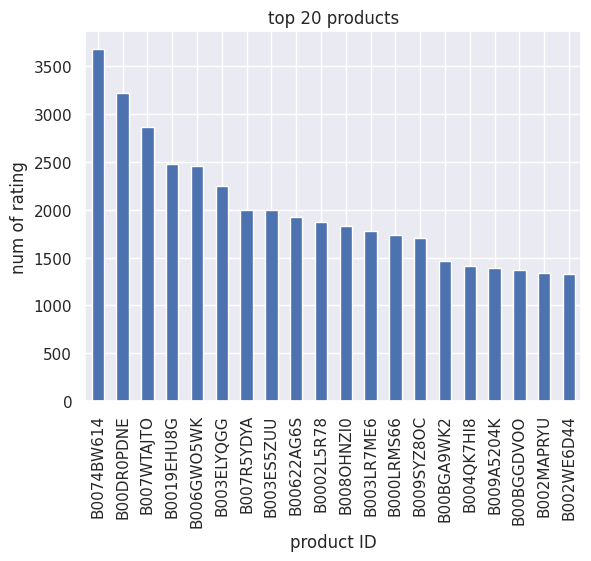

In [ ]:
no_of_rating_per_product.head(20).plot(kind='bar')
plt.xlabel('product ID')
plt.ylabel('num of rating')
plt.title('top 20 products')
plt.show()

In [ ]:
#average rating product
mean_rating_product_count=pd.DataFrame(data.groupby('productId')['rating'].mean())

In [ ]:
mean_rating_product_count.head()

,rating
productId,
0972683275,4.438356
1400501466,3.549020
1400532655,3.621951
140053271X,3.912088
B00000DM9W,4.716418


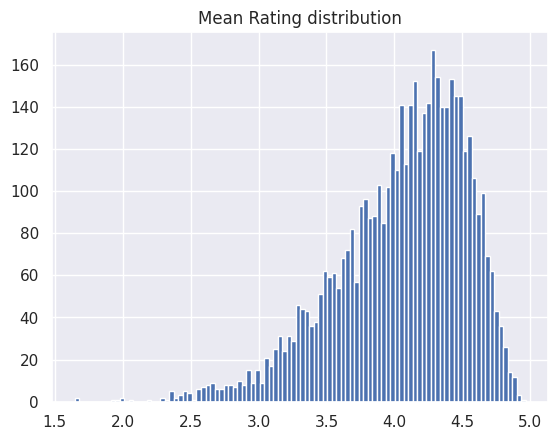

In [ ]:
# plot the rating distribution of average rating product

plt.hist(mean_rating_product_count['rating'],bins=100)
plt.title('Mean Rating distribution')
plt.show()

In [ ]:
# check the skewness of the mean rating data
mean_rating_product_count['rating'].skew()

-0.8933866752086252

In [ ]:
#it is highly negative skewed

In [ ]:
mean_rating_product_count['rating_counts']=pd.DataFrame(data.groupby('productId')['rating'].count())


In [ ]:
mean_rating_product_count.head()

,rating,rating_counts
productId,,
0972683275,4.438356,219
1400501466,3.549020,51
1400532655,3.621951,82
140053271X,3.912088,91
B00000DM9W,4.716418,67


In [ ]:
#highest mean rating product
mean_rating_product_count[mean_rating_product_count['rating_counts']==mean_rating_product_count['rating_counts'].max()]

,rating,rating_counts
productId,,
B0074BW614,4.525115,3683


In [ ]:
# min mean rating product

print('min average rating product: ',mean_rating_product_count['rating_counts'].min())
print('total min average rating products : ',mean_rating_product_count[mean_rating_product_count['rating_counts']==mean_rating_product_count['rating_counts'].min()].shape[0])

min average rating product:  50
total min average rating products :  122


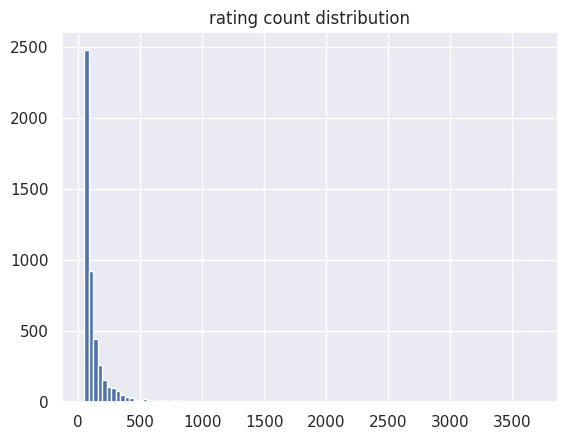

In [ ]:
# plot the rating count of mean_rating_count

plt.hist(mean_rating_product_count['rating_counts'],bins=100)
plt.title('rating count distribution')
plt.show()

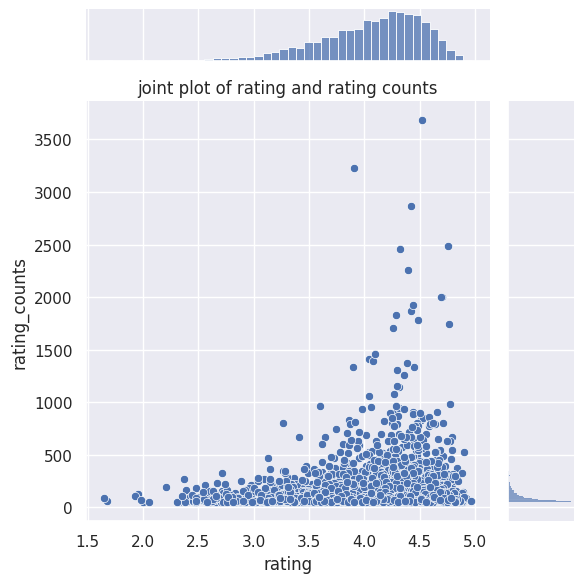

In [ ]:
# joint plot of rating and rating counts
sns.jointplot(x='rating',y='rating_counts',data=mean_rating_product_count)
plt.title('joint plot of rating and rating counts')
plt.tight_layout()
plt.show()

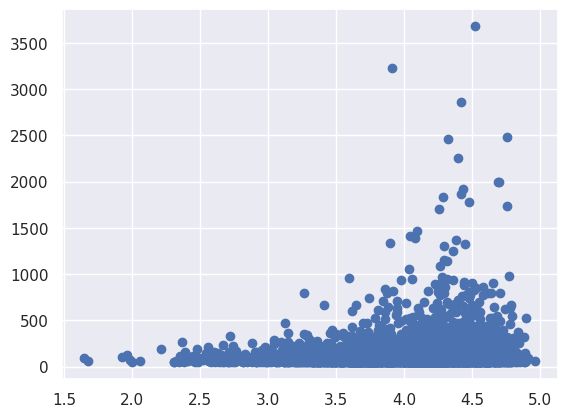

In [ ]:
plt.scatter(x=mean_rating_product_count['rating'],y=mean_rating_product_count['rating_counts'])
plt.show()

In [ ]:
print('Correlation between Rating and Rating Counts is : {} '.format(mean_rating_product_count['rating'].corr(mean_rating_product_count['rating_counts'])))

Correlation between Rating and Rating Counts is : 0.11612193881231488 


## Collaberative Filtering(item-item recommendation)

collaberative filtering is commonly used for recommender systems.CF is based on the idea that the best recommendations comes from people who have similar tastes.In other words,it uses historical item ratings of like-minded people to predict how someone would rate an item.Collaborative filtering has two sub-categoried that are generally called memory- based and model-based approaches

In [ ]:
#import suprise library for colleberative foiltering

check_and_install_library('surprise')
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import train_test_split

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


surprise is not installed. Installing...


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

Collecting surprise

Downloading surprise-0.1-py2.py3-none-any.whl (1.8 kB)

Collecting scikit-surprise (from surprise)

Downloading scikit-surprise-1.1.3.tar.gz (771 kB)

Output()

Preparing metadata (setup.py): started

Preparing metadata (setup.py): finished with status 'done'

Requirement already satisfied: joblib>=1.0.0 in /usr/local/lib/python3.10/dist-packages (from scikit-surprise->surprise) (1.2.0)

Requirement already satisfied: numpy>=1.17.3 in /usr/local/lib/python3.10/dist-packages (from scikit-surprise->surprise) (1.22.4)

Requirement already satisfied: scipy>=1.3.2 in /usr/local/lib/python3.10/dist-packages (from scikit-surprise->surprise) (1.10.1)

Building wheels for collected packages: scikit-surprise

Building wheel for scikit-surprise (setup.py): started

Building wheel for scikit-surprise (setup.py): finished with status 'done'

Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3096305 sha256=651ec34528df7f85c294e47b6c487731603e85e9fda3dbdab6230b59516d107f

Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445

Successfully built scikit-surprise

Installing collected packages: scikit-surprise, surprise

Successfully installed scikit-surprise-1.1.3 surprise-0.1

In [ ]:
#Reading the dataset
reader = Reader(rating_scale=(1, 5))
surprise_data = Dataset.load_from_df(data,reader)

In [ ]:
#splitting surprise the dataset into 80,20 ratio using train_test_split
trainset,testset=train_test_split(surprise_data,test_size=0.3,random_state=42)

In [ ]:
# use user_based true/false to switch between user-based or item-based collaberative
algo=KNNWithMeans(k=5,sim_options={'name':'pearson_baseline','user_based':False})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [ ]:
#make prediction using testset
test_pred=algo.test(testset)

In [ ]:
#print RMSE
print('Item-based Model : Test Set')
accuracy.rmse(test_pred,verbose=True)

Item-based Model : Test Set
RMSE: 1.3168


1.316771109331515

## Model-Based Collaboration filtering

 These methods are based on machine learning and data mining techniques. The goal is to train models to be able to make predictions. For example, we could use existing user-item interactions to train a model to predict the top-5 items that a user might like the most

In [ ]:
data2=data.sample(20000)
rating_matrix=data2.pivot_table(values='rating', index='userId', columns='productId',fill_value=0)
rating_matrix.head()


productId,0972683275,1400501466,1400532655,140053271X,B00000DM9W,B00000J061,B00000J1V5,B00000JI4F,B00000K135,B00000K4KH,...,B00HNFPZF0,B00HNGB1YS,B00HTPHK5W,B00I2VIR2M,B00I2ZBD1U,B00I4C5QQE,B00I94IPTW,B00INNP5VU,B00IO1V33U,B00IVPU786
userId,,,,,,,,,,,,,,,,,,,,,
A0007264119AOT3YK1X2E,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A00471742QKXLMG5CCZQO,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A004956818MEPP53CS0Q7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A008054728TI68GOSBDSX,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A01064213EIVJ8IDC2E6K,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#check the shape of the rating_matrix
rating_matrix.shape

(19889, 4416)

In [ ]:
#transpose the matrix to make column(productId) as index and index as column(userId)
x_ratings_matrix=rating_matrix.T
x_ratings_matrix.head()

userId,A0007264119AOT3YK1X2E,A00471742QKXLMG5CCZQO,A004956818MEPP53CS0Q7,A008054728TI68GOSBDSX,A01064213EIVJ8IDC2E6K,A01359547F2QZMA79WRT,A02058911H5ITPHXQ8YIX,A03192381JR59BLH1CIL7,A038024531TN8WN9JEN32,A0380485C177Q6QQNJIX,...,AZWD4A73EFKGC,AZWKQNXNAOGDJ,AZWPQF6V2EL16,AZX96MTMYA8DG,AZXFS8GCTSQ5R,AZXLUKCMUEG5X,AZXZ66R53V6H8,AZYTIZ4EHOAL8,AZYX4FGGX3V72,AZZB6XD153BP
productId,,,,,,,,,,,,,,,,,,,,,
0972683275,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1400501466,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1400532655,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
140053271X,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B00000DM9W,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
x_ratings_matrix.shape

(4416, 19889)

In [ ]:
#decomposition of the matrix using singular value decomposition technique
from sklearn.decomposition import TruncatedSVD
SVD=TruncatedSVD(n_components=10)
decomposed_matrix=SVD.fit_transform(x_ratings_matrix)
decomposed_matrix.shape

(4416, 10)

In [ ]:
# correlation matrix
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(4416, 4416)

In [ ]:
x_ratings_matrix.index[10]

'B00001OWYM'

In [ ]:
i='B00001OWYM'
product_names = list(x_ratings_matrix.index)
product_id = product_names.index(i)
print(product_id)

10


In [ ]:
correlation_product_ID = correlation_matrix[product_id]
correlation_product_ID.shape

(4416,)

In [ ]:
correlation_matrix[correlation_product_ID>0.75].shape

(143, 4416)

In [ ]:
#Recommending top 20 highly correlated products in sequence
recommend = list(x_ratings_matrix.index[correlation_product_ID > 0.75])
recommend[:20]

['1400532655',
 'B00001OWYM',
 'B00002EQCW',
 'B000058AKE',
 'B00005BC0K',
 'B000067O5G',
 'B00007KDVK',
 'B00009KH63',
 'B00011KM38',
 'B0002BEX8W',
 'B0007MWE1E',
 'B0007SL4IW',
 'B000812QC6',
 'B000A6NV0U',
 'B000EY5F5C',
 'B000F28DP2',
 'B000H6AY6M',
 'B000HZGQ9C',
 'B000ND75C0',
 'B000U5TUWE']